<a href="https://colab.research.google.com/github/marelycarcamo/Challenge_TelecomX_Parte2/blob/main/Challenge_TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=lightgreen size=10> DESAFIO TELECOMX LATAM PARTE 2</font>
---

## <font size=8>🛠️ 1. Preparación de los datos</font>

### 1.1 Extracción del Archivo Tratado

In [532]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [533]:
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Estadística_Machine_Learning/Challenge_TelecomX_Parte2/datos_tratados.csv')
datos.shape

(7043, 23)

In [534]:
datos.sample(6)

,customerID,Churn,cliente_Genero,cliente_Senior,cliente_Pareja,cliente_Dependientes,cliente_Permanencia,telefono_ServicioTelefonico,telefono_LineasMultiple,internet_ServicioInternet,...,internet_SoporteTecnico,internet_StreamingTV,internet_StreamingPeliculas,cuenta_Contrato,cuenta_FacturacionElectronica,cuenta_MetodoPago,cuenta_CuentaMensual,cuenta_CuentaTotal,tiene_Fibra_Optica,Cuentas_Diarias
4270,6015-VVHHE,Yes,Female,1,No,No,5,Yes,Yes,Fiber optic,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),83.15,446.05,1,2.771667
4599,6481-OGDOO,Yes,Male,0,Yes,No,67,Yes,No,Fiber optic,...,No,No,Yes,One year,Yes,Credit card (automatic),90.60,6056.15,1,3.020000
6977,9903-LYSAB,No,Male,0,Yes,No,18,Yes,Yes,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.15,1305.95,1,2.438333
1169,1724-BQUHA,Yes,Male,1,No,No,5,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.50,477.70,1,2.983333
5852,8225-BTJAU,Yes,Male,1,No,No,10,Yes,No,Fiber optic,...,No,No,Yes,Month-to-month,Yes,Electronic check,79.25,793.55,1,2.641667
6397,9060-HJJRW,No,Female,0,No,No,51,No,No phone service,DSL,...,No,Yes,Yes,One year,Yes,Credit card (automatic),56.40,2928.50,0,1.880000


In [535]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customerID                      7043 non-null   object 
 1   Churn                           7043 non-null   object 
 2   cliente_Genero                  7043 non-null   object 
 3   cliente_Senior                  7043 non-null   int64  
 4   cliente_Pareja                  7043 non-null   object 
 5   cliente_Dependientes            7043 non-null   object 
 6   cliente_Permanencia             7043 non-null   int64  
 7   telefono_ServicioTelefonico     7043 non-null   object 
 8   telefono_LineasMultiple         7043 non-null   object 
 9   internet_ServicioInternet       7043 non-null   object 
 10  internet_SeguridadOnline        7043 non-null   object 
 11  internet_RespaldoOnline         7043 non-null   object 
 12  internet_ProteccionDispositivo  70

### 1.2 Eliminación de Columnas Irrelevantes

In [566]:
# Separar las variables explicativas de las variables de respuesta.
X = datos.drop(['Churn','customerID','tiene_Fibra_Optica'], axis=1)
y = datos['Churn']

In [567]:
X

,cliente_Genero,cliente_Senior,cliente_Pareja,cliente_Dependientes,cliente_Permanencia,telefono_ServicioTelefonico,telefono_LineasMultiple,internet_ServicioInternet,internet_SeguridadOnline,internet_RespaldoOnline,internet_ProteccionDispositivo,internet_SoporteTecnico,internet_StreamingTV,internet_StreamingPeliculas,cuenta_Contrato,cuenta_FacturacionElectronica,cuenta_MetodoPago,cuenta_CuentaMensual,cuenta_CuentaTotal,Cuentas_Diarias
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7039,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7040,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7041,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [538]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


### 1.3 Encoding

In [569]:
# Creación de lista de columnas categóricas
listado_columns=[]
for i in X.columns:
  if datos[i].dtype == 'object':
    listado_columns.append(i)
listado_columns

['cliente_Genero',
 'cliente_Pareja',
 'cliente_Dependientes',
 'telefono_ServicioTelefonico',
 'telefono_LineasMultiple',
 'internet_ServicioInternet',
 'internet_SeguridadOnline',
 'internet_RespaldoOnline',
 'internet_ProteccionDispositivo',
 'internet_SoporteTecnico',
 'internet_StreamingTV',
 'internet_StreamingPeliculas',
 'cuenta_Contrato',
 'cuenta_FacturacionElectronica',
 'cuenta_MetodoPago']

In [540]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), listado_columns),
    remainder='passthrough',
    force_int_remainder_cols=False,
    sparse_threshold=0
)

In [541]:
# Aplicar la transformación one-hot a las variables explicativas X.
X_encoded = one_hot.fit_transform(X)

In [542]:
# Obtener los nombres de las características resultantes después de la transformación one-hot.
columnas_one_hot = one_hot.get_feature_names_out()
columnas_one_hot

array(['onehotencoder__cliente_Genero_Male',
       'onehotencoder__cliente_Pareja_Yes',
       'onehotencoder__cliente_Dependientes_Yes',
       'onehotencoder__telefono_ServicioTelefonico_Yes',
       'onehotencoder__telefono_LineasMultiple_No',
       'onehotencoder__telefono_LineasMultiple_No phone service',
       'onehotencoder__telefono_LineasMultiple_Yes',
       'onehotencoder__internet_ServicioInternet_DSL',
       'onehotencoder__internet_ServicioInternet_Fiber optic',
       'onehotencoder__internet_ServicioInternet_No',
       'onehotencoder__internet_SeguridadOnline_No',
       'onehotencoder__internet_SeguridadOnline_No internet service',
       'onehotencoder__internet_SeguridadOnline_Yes',
       'onehotencoder__internet_RespaldoOnline_No',
       'onehotencoder__internet_RespaldoOnline_No internet service',
       'onehotencoder__internet_RespaldoOnline_Yes',
       'onehotencoder__internet_ProteccionDispositivo_No',
       'onehotencoder__internet_ProteccionDispositi

In [543]:
X_df = pd.DataFrame(X_encoded, columns=one_hot.get_feature_names_out())
X_df

,onehotencoder__cliente_Genero_Male,onehotencoder__cliente_Pareja_Yes,onehotencoder__cliente_Dependientes_Yes,onehotencoder__telefono_ServicioTelefonico_Yes,onehotencoder__telefono_LineasMultiple_No,onehotencoder__telefono_LineasMultiple_No phone service,onehotencoder__telefono_LineasMultiple_Yes,onehotencoder__internet_ServicioInternet_DSL,onehotencoder__internet_ServicioInternet_Fiber optic,onehotencoder__internet_ServicioInternet_No,...,onehotencoder__cuenta_FacturacionElectronica_Yes,onehotencoder__cuenta_MetodoPago_Bank transfer (automatic),onehotencoder__cuenta_MetodoPago_Credit card (automatic),onehotencoder__cuenta_MetodoPago_Electronic check,onehotencoder__cuenta_MetodoPago_Mailed check,remainder__cliente_Senior,remainder__cliente_Permanencia,remainder__cuenta_CuentaMensual,remainder__cuenta_CuentaTotal,remainder__Cuentas_Diarias
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,9.0,65.60,593.30,2.186667
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,59.90,542.40,1.996667
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,4.0,73.90,280.85,2.463333
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,13.0,98.00,1237.85,3.266667
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,3.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,13.0,55.15,742.90,1.838333
7039,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,22.0,85.10,1873.70,2.836667
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,50.30,92.75,1.676667
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,67.0,67.85,4627.65,2.261667


In [570]:
y.head()

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes


## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [545]:
# Importar LabelEncoder de scikit-learn para transformar la variable de respuesta.
from sklearn.preprocessing import LabelEncoder

In [546]:
# Instanciar el objeto LabelEncoder.
label_encoder = LabelEncoder()

In [547]:
# Ajustar y transformar la variable de respuesta 'y' a formato numérico (0 o 1).
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [573]:
y_df = pd.DataFrame(y)
y_df.head(3)

,Churn
0,No
1,No
2,Yes


### 1.4 Verificación de la Proporción de Cancelación (Churn)

In [574]:
valores_churn = pd.DataFrame(y_df.value_counts()).reset_index()
valores_churn.columns = ['Churn','Cantidad']
valores_churn

,Churn,Cantidad
0,No,5174
1,Yes,1869


In [550]:
fig1 =px.pie(
    names = valores_churn.Churn,
    values = valores_churn.Cantidad,
    title = 'Proporción de Cancelación (Churn)',

    )
fig1.update_legends(title_text = 'Cancelación (Churn)',
                    font = dict(size = 12)

                    )
fig1.update_traces(textposition='inside', textinfo='label+percent',  insidetextfont=dict(color = 'white', size=14),
                       # Añadir el mapeo para mostrar los nombres correctos en el gráfico
    labels=["Vigente" if label == 0 else "Cancelado" for label in valores_churn['Churn']]
                   )

fig1.update_layout(
    title_x=0.5,
    width=500,
    height=500

)

fig1.show()

### 1.5 Balanceo de Clases

In [551]:
#Aplicar técnicas de balanceo: undersampling o oversampling.

### 1.6 Normalización o Estandarización

In [552]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

## <font size=8>🎯 2. Correlación y Selección de Variables</font>

### 2.1 Análisis de Correlación

In [575]:
# Gráfico de correlación
fig2 = px.imshow(X_df.corr())
fig2.update_layout(
    title='Matriz de Correlación',
    title_x=0.5,
    width=800,
    height=800,
    xaxis=dict(tickangle=-45)
)
fig2.show()


### 2.2 Análisis Dirigido

2.2.1. Tiempo de Contrato X Cancelación

In [580]:
fig3=px.box(X_df, x='remainder__cliente_Permanencia', color=y, title='Tiempo de Contrato X Cancelación')
fig3.update_layout(
    title_x=0.5,
    width=900,
    height=500
)

fig3.update_legends(title_text = 'Cancelación (Churn)',
                    font = dict(size = 12)
                    )
fig3.show()

2.2.2. Gasto Total X Cancelación

In [577]:
fig4= px.box(X_df, x='remainder__cuenta_CuentaTotal', color=y, title='Gasto Total X Cancelación')
fig4.update_layout(
    title_x=0.5,
    width=900,
    height=500
)

fig4.update_legends(title_text = 'Cancelación (Churn)',
                    font = dict(size = 12)

                    )
fig4.show()

## <font size=10>🤖 3. Modelado Predictivo </font>

### 3.1 Separación de Datos

In [556]:
#Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

### 3.2 Creación de Modelos

#### 3.2.1 Modelo Arbol de Decisión

In [581]:
# Inicializa un nuevo modelo de árbol de decisión
arbol = DecisionTreeClassifier(max_depth=3)

arbol.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {arbol.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {arbol.score(X_test,y_test)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.7816937119675457
La exactitud del modelo con el conjunto de validación es de: 0.7761476573592049


#### 3.2.2. Modelo Random Forest

In [582]:
random_forest = RandomForestClassifier(max_depth = 2)
random_forest.fit(X_train,y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {random_forest.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {random_forest.score(X_test,y_test)}')

La exactitud del modelo con el conjunto de entrenamiento es de: 0.765973630831643
La exactitud del modelo con el conjunto de validación es de: 0.7567439659252247


### 3.3 Evaluación de los Modelos

In [559]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

#### 3.3.1 Evaluación. Modelo Arbol de Decisión

In [560]:
prevision_arbol = arbol.predict(X_val) # Realiza predicciones en el conjunto de validación
matriz_confusion = confusion_matrix(y_val,prevision_arbol) # Calcula la matriz de confusión
print(matriz_confusion) # Imprime la matriz de confusión

[[669  40]
 [161 116]]


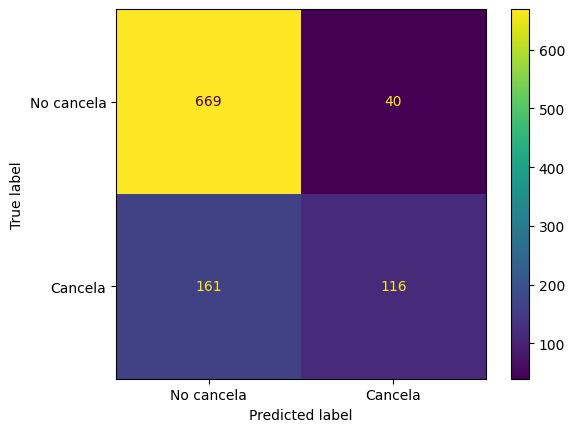

In [561]:
# Crea una visualización de la matriz de confusión sin etiquetas personalizadas
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No cancela','Cancela'])
visualizacion.plot(); # Muestra la visualización

In [562]:
# Imprime la precisión, sensibilidad (recall) y exactitud (accuracy) del modelo en el conjunto de validación, F1-score del modelo en el conjunto de validación.
print(f'Precisión (Decisión Tree)            : {precision_score(y_val,prevision_arbol)}')
print(f'Sensibilidad (Recall - Decisión Tree): {recall_score(y_val,prevision_arbol)}')
print(f'Exactitud (accuracy - Decisión Tree) : {accuracy_score(y_val,prevision_arbol)}')

print(f'F1-score (Decisión Tree)             : {f1_score(y_val,prevision_arbol)}')

Precisión (Decisión Tree)            : 0.7435897435897436
Sensibilidad (Recall - Decisión Tree): 0.4187725631768953
Exactitud (accuracy - Decisión Tree) : 0.7961460446247465
F1-score (Decisión Tree)             : 0.535796766743649


#### 3.3.2 Matriz de Confusión. Modelo Random Forest

In [563]:
prevision_rf = random_forest.predict(X_val) # Realiza predicciones en el conjunto de validación
matriz_confusion = confusion_matrix(y_val,prevision_rf) # Calcula la matriz de confusión
print(matriz_confusion) # Imprime la matriz de confusión

[[696  13]
 [225  52]]


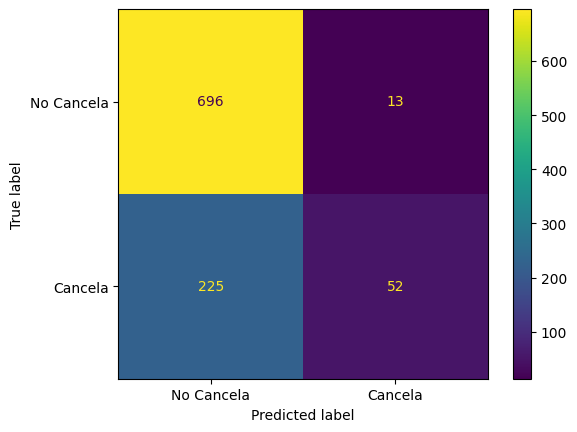

In [564]:
# Crea una visualización de la matriz de confusión sin etiquetas personalizadas
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No Cancela','Cancela'])
visualizacion.plot(); # Muestra la visualización

In [565]:
# Imprime la precisión, sensibilidad (recall) y exactitud (accuracy) del modelo en el conjunto de validación, F1-score del modelo en el conjunto de validación.
print(f'Precisión (Decisión Random Forest)            : {precision_score(y_val,prevision_rf)}')
print(f'Sensibilidad (Recall - Decisión Random Forest): {recall_score(y_val,prevision_rf)}')
print(f'Exactitud (accuracy - Decisión Random Forest) : {accuracy_score(y_val,prevision_rf)}')

print(f'F1-score (Decisión Random Forest)             : {f1_score(y_val,prevision_rf)}')

Precisión (Decisión Random Forest)            : 0.8
Sensibilidad (Recall - Decisión Random Forest): 0.18772563176895307
Exactitud (accuracy - Decisión Random Forest) : 0.7586206896551724
F1-score (Decisión Random Forest)             : 0.30409356725146197


## <font size=8>📋 4. Interpretación y Conclusiones</font>

### 4.1 Análisis de la Importancia de las Variables

### 4.2 Conclusión